In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.linear_model import LinearRegression

In [16]:
# --- 1. CONFIGURATION ---
FILE_PATH = r"C:\Users\mshif\python\capture_50m_chunk.dat" # Update if needed
FS = 50e6              # Sample Rate
M_KEEP = 2048          # Chunk size
ZC_SEQ_LEN = 256       # Length of Zadoff-Chu sequence

# Zadoff-Chu Reference (Hardcoded from previous context)
ZC_REF = np.array([
    1.0+0.0j, 1.0000+0.0000j, 0.9997-0.0246j, 0.9973-0.0739j, 0.9891-0.1473j,
    0.9698-0.2439j, 0.9325-0.3612j, 0.8691-0.4947j, 0.7713-0.6365j, 0.6317-0.7752j,
    0.4457-0.8952j, 0.2139-0.9768j, -0.0554-0.9985j, -0.3439-0.9390j, -0.6221-0.7829j,
    -0.8502-0.5264j, -0.9830-0.1837j, -0.9781+0.2079j, -0.8090+0.5878j, -0.4785+0.8781j,
    -0.0308+0.9995j, 0.4457+0.8952j, 0.8302+0.5575j, 0.9988+0.0493j, 0.8691-0.4947j,
    0.4457-0.8952j, -0.1534-0.9882j, -0.7136-0.7005j, -0.9939-0.1107j, -0.8370+0.5472j,
    -0.2737+0.9618j, 0.4457+0.8952j, 0.9411+0.3382j, 0.9032-0.4291j, 0.3090-0.9511j,
    -0.5000-0.8660j, -0.9830-0.1837j, -0.7634+0.6459j, 0.0431+0.9991j, 0.8302+0.5575j,
    0.9325-0.3612j, 0.2139-0.9768j, -0.7136-0.7005j, -0.9667+0.2558j, -0.2499+0.9683j,
    0.7390+0.6737j, 0.9325-0.3612j, 0.0677-0.9977j, -0.8868-0.4622j, -0.7634+0.6459j,
    0.3324+0.9432j, 1.0000+0.0000j, 0.3090-0.9511j, -0.8233-0.5677j, -0.7634+0.6459j,
    0.4457+0.8952j, 0.9698-0.2439j, -0.0554-0.9985j, -0.9939-0.1107j, -0.2499+0.9683j,
    0.9325+0.3612j, 0.4457-0.8952j, -0.8629-0.5053j, -0.5421+0.8403j, 0.8302+0.5575j,
    0.5524-0.8336j, -0.8502-0.5264j, -0.4785+0.8781j, 0.9135+0.4067j, 0.3090-0.9511j,
    -0.9830-0.1837j, -0.0308+0.9995j, 0.9891-0.1473j, -0.3439-0.9390j, -0.8370+0.5472j,
    0.7390+0.6737j, 0.4457-0.8952j, -0.9872-0.1595j, 0.1656+0.9862j, 0.8691-0.4947j,
    -0.7791-0.6269j, -0.2737+0.9618j, 0.9891-0.1473j, -0.5626-0.8267j, -0.4785+0.8781j,
    1.0000+0.0000j, -0.5000-0.8660j, -0.4785+0.8781j, 0.9973-0.0739j, -0.6221-0.7829j,
    -0.2737+0.9618j, 0.9325-0.3612j, -0.8629-0.5053j, 0.1656+0.9862j, 0.6317-0.7752j,
    -0.9981+0.0616j, 0.7390+0.6737j, -0.0554-0.9985j, -0.6412+0.7674j, 0.9891-0.1473j,
    -0.8502-0.5264j, 0.3324+0.9432j, 0.3090-0.9511j, -0.8090+0.5878j, 0.9997-0.0246j,
    -0.8502-0.5264j, 0.4457+0.8952j, 0.0677-0.9977j, -0.5421+0.8403j, 0.8691-0.4947j,
    -0.9981+0.0616j, 0.9325+0.3612j, -0.7136-0.7005j, 0.4011+0.9160j, -0.0554-0.9985j,
    -0.2737+0.9618j, 0.5524-0.8336j, -0.7634+0.6459j, 0.9032-0.4291j, -0.9781+0.2079j,
    1.0000+0.0000j, -0.9830-0.1837j, 0.9411+0.3382j, -0.8868-0.4622j, 0.8302+0.5575j,
    -0.7791-0.6269j, 0.7390+0.6737j, -0.7136-0.7005j, 0.7049+0.7093j, -0.7136-0.7005j,
    0.7390+0.6737j, -0.7791-0.6269j, 0.8302+0.5575j, -0.8868-0.4622j, 0.9411+0.3382j,
    -0.9830-0.1837j, 1.0000+0.0000j, -0.9781+0.2079j, 0.9032-0.4291j, -0.7634+0.6459j,
    0.5524-0.8336j, -0.2737+0.9618j, -0.0554-0.9985j, 0.4011+0.9160j, -0.7136-0.7005j,
    0.9325+0.3612j, -0.9981+0.0616j, 0.8691-0.4947j, -0.5421+0.8403j, 0.0677-0.9977j,
    0.4457+0.8952j, -0.8502-0.5264j, 0.9997-0.0246j, -0.8090+0.5878j, 0.3090-0.9511j,
    0.3324+0.9432j, -0.8502-0.5264j, 0.9891-0.1473j, -0.6412+0.7674j, -0.0554-0.9985j,
    0.7390+0.6737j, -0.9981+0.0616j, 0.6317-0.7752j, 0.1656+0.9862j, -0.8629-0.5053j,
    0.9325-0.3612j, -0.2737+0.9618j, -0.6221-0.7829j, 0.9973-0.0739j, -0.4785+0.8781j,
    -0.5000-0.8660j, 1.0000+0.0000j, -0.4785+0.8781j, -0.5626-0.8267j, 0.9891-0.1473j,
    -0.2737+0.9618j, -0.7791-0.6269j, 0.8691-0.4947j, 0.1656+0.9862j, -0.9872-0.1595j,
    0.4457-0.8952j, 0.7390+0.6737j, -0.8370+0.5472j, -0.3439-0.9390j, 0.9891-0.1473j,
    -0.0308+0.9995j, -0.9830-0.1837j, 0.3090-0.9511j, 0.9135+0.4067j, -0.4785+0.8781j,
    -0.8502-0.5264j, 0.5524-0.8336j, 0.8302+0.5575j, -0.5421+0.8403j, -0.8629-0.5053j,
    0.4457-0.8952j, 0.9325+0.3612j, -0.2499+0.9683j, -0.9939-0.1107j, -0.0554-0.9985j,
    0.9698-0.2439j, 0.4457+0.8952j, -0.7634+0.6459j, -0.8233-0.5677j, 0.3090-0.9511j,
    1.0000+0.0000j, 0.3324+0.9432j, -0.7634+0.6459j, -0.8868-0.4622j, 0.0677-0.9977j,
    0.9325-0.3612j, 0.7390+0.6737j, -0.2499+0.9683j, -0.9667+0.2558j, -0.7136-0.7005j,
    0.2139-0.9768j, 0.9325-0.3612j, 0.8302+0.5575j, 0.0431+0.9991j, -0.7634+0.6459j,
    -0.9830-0.1837j, -0.5000-0.8660j, 0.3090-0.9511j, 0.9032-0.4291j, 0.9411+0.3382j,
    0.4457+0.8952j, -0.2737+0.9618j, -0.8370+0.5472j, -0.9939-0.1107j, -0.7136-0.7005j,
    -0.1534-0.9882j, 0.4457-0.8952j, 0.8691-0.4947j, 0.9988+0.0493j, 0.8302+0.5575j,
    0.4457+0.8952j, -0.0308+0.9995j, -0.4785+0.8781j, -0.8090+0.5878j, -0.9781+0.2079j,
    -0.9830-0.1837j, -0.8502-0.5264j, -0.6221-0.7829j, -0.3439-0.9390j, -0.0554-0.9985j,
    0.2139-0.9768j, 0.4457-0.8952j, 0.6317-0.7752j, 0.7713-0.6365j, 0.8691-0.4947j,
    0.9325-0.3612j, 0.9698-0.2439j, 0.9891-0.1473j, 0.9973-0.0739j, 0.9997-0.0246j,
    1.0000+0.0000j
], dtype=np.complex64)
ZC_REF_FREQ = np.fft.fft(ZC_REF)

In [17]:
# --- 2. HELPER FUNCTIONS ---

def calculate_noise_stats(magnitude_array):
    """
    Experimental Noise Calculation:
    Sorts magnitude, takes bottom 50%, calculates mean and std.
    """
    sorted_mag = np.sort(magnitude_array)
    # Take bottom 50%
    noise_part = sorted_mag[:len(sorted_mag)//2]
    noise_floor = np.mean(noise_part)
    noise_std = np.std(noise_part)
    return noise_floor, noise_std

def refine_to_leading_edge(chunk_corr_mag, peak_idx, threshold, search_back=100):
    """
    Backwards search from the max peak to find the Leading Edge.
    Logic: Find the last point BEFORE the peak that was BELOW the threshold.
    """
    # Define search window (backwards from peak)
    start_search = max(0, peak_idx - search_back)
    
    # Extract the window *before* the peak
    window = chunk_corr_mag[start_search : peak_idx]
    
    # Find indices in this window where signal is BELOW threshold
    below_thresh_indices = np.where(window < threshold)[0]
    
    if len(below_thresh_indices) > 0:
        # The last index that was below threshold corresponds to the 
        # sample just before the rising edge starts.
        last_noise_rel = below_thresh_indices[-1]
        
        # Leading edge start is the next sample
        first_path_idx = start_search + last_noise_rel + 1
        return first_path_idx
    else:
        # If signal is always above threshold in this window, return original peak
        return peak_idx

def estimate_and_correct_cfo(cirs, cfrs):
    if len(cirs) < 2: return cirs, cfrs
    peak_indices = np.argmax(np.abs(cirs), axis=1)
    complex_peaks = np.array([cirs[i, idx] for i, idx in enumerate(peak_indices)])
    phase_diffs = complex_peaks[1:] * np.conj(complex_peaks[:-1])
    avg_phase_diff = np.angle(np.mean(phase_diffs))
    
    num_symbols = len(cfrs)
    correction_vector = np.exp(-1j * avg_phase_diff * np.arange(num_symbols))
    corrected_cfrs = cfrs * correction_vector[:, np.newaxis]
    corrected_cirs = np.fft.ifft(corrected_cfrs, axis=1)
    return corrected_cirs, corrected_cfrs

def estimate_and_correct_sro(cirs, cfrs):
    if len(cirs) < 2: return cirs, cfrs
    first_sym_phase = np.unwrap(np.angle(cfrs[0]))
    last_sym_phase = np.unwrap(np.angle(cfrs[-1]))
    
    X = np.arange(len(first_sym_phase)).reshape(-1, 1)
    slope_first = LinearRegression().fit(X, first_sym_phase).coef_[0]
    slope_last = LinearRegression().fit(X, last_sym_phase).coef_[0]
    slope_drift = slope_last - slope_first
    
    num_symbols = len(cfrs)
    subcarriers = np.arange(cfrs.shape[1])
    corrected_cfrs = np.zeros_like(cfrs)
    
    for i in range(num_symbols):
        current_drift = slope_drift * (i / (num_symbols - 1))
        correction_ramp = np.exp(-1j * current_drift * subcarriers)
        corrected_cfrs[i] = cfrs[i] * correction_ramp
        
    corrected_cirs = np.fft.ifft(corrected_cfrs, axis=1)
    return corrected_cirs, corrected_cfrs

In [18]:
# --- 3. MAIN LOOP ---

# Load Data
try:
    rx_raw = np.fromfile(FILE_PATH, dtype=np.complex64)
except FileNotFoundError:
    print("WARNING: File not found. Creating dummy data.")
    rx_raw = np.zeros(M_KEEP * 50, dtype=np.complex64)

Processing 513 chunks using Leading Edge Detection...
Debug Chunk 0: Max Peak @ 131, Leading Edge @ 123


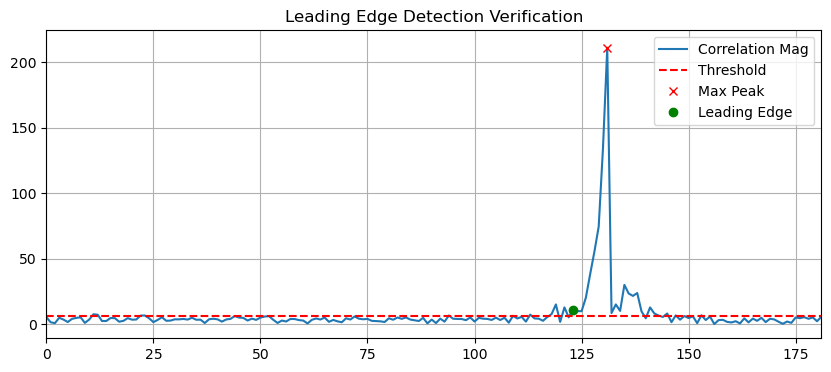

In [19]:
# Reshape (Keep M in N logic - already chunked)
num_full_chunks = len(rx_raw) // M_KEEP
rx_chunks = rx_raw[:num_full_chunks * M_KEEP].reshape(num_full_chunks, M_KEEP)

all_corrected_cfrs = []
THRESHOLD_FACTOR = 4.0 # As requested

print(f"Processing {num_full_chunks} chunks using Leading Edge Detection...")

for i, chunk in enumerate(rx_chunks):
    
    # 1. FFT Correlation (Full Chunk)
    chunk_fft = np.fft.fft(chunk)
    zc_padded_fft = np.fft.fft(ZC_REF, n=len(chunk))
    correlation_freq = chunk_fft * np.conj(zc_padded_fft)
    correlation_time = np.fft.ifft(correlation_freq)
    mag = np.abs(correlation_time)
    
    # 2. Calculate Noise Stats (Per Chunk)
    noise_floor, noise_std = calculate_noise_stats(mag)
    threshold = noise_floor + (THRESHOLD_FACTOR * noise_std)
    
    # 3. Find Rough Peaks (High Confidence)
    # We use a slightly higher threshold for the initial "peak find" to ensure we
    # are looking at a valid symbol, then we search backward for the edge.
    rough_peaks, _ = signal.find_peaks(mag, height=threshold, distance=ZC_SEQ_LEN)
    
    if len(rough_peaks) == 0:
        continue

    chunk_cirs = []
    chunk_cfrs = []
    
    # 4. Refine Each Peak
    for rough_peak in rough_peaks:
        # --- KEY INTEGRATION: LEADING EDGE SEARCH ---
        first_path_idx = refine_to_leading_edge(mag, rough_peak, threshold, search_back=100)
        
        # Debug Visualization (First chunk, first symbol only)
        if i == 0 and rough_peak == rough_peaks[0]:
            print(f"Debug Chunk 0: Max Peak @ {rough_peak}, Leading Edge @ {first_path_idx}")
            plt.figure(figsize=(10, 4))
            plt.plot(mag, label='Correlation Mag')
            plt.axhline(threshold, color='r', linestyle='--', label='Threshold')
            plt.plot(rough_peak, mag[rough_peak], 'rx', label='Max Peak')
            plt.plot(first_path_idx, mag[first_path_idx], 'go', label='Leading Edge')
            plt.xlim(max(0, rough_peak - 150), rough_peak + 50)
            plt.title("Leading Edge Detection Verification")
            plt.legend()
            plt.grid(True)
            plt.show()

        # Check Bounds
        if first_path_idx + ZC_SEQ_LEN > len(chunk):
            continue
            
        # Extract based on LEADING EDGE
        r_seq = chunk[first_path_idx : first_path_idx + ZC_SEQ_LEN]
        
        # Standard Processing
        r_freq = np.fft.fft(r_seq)
        h_freq = r_freq * np.conj(ZC_REF_FREQ) # CFR
        h_time = np.fft.ifft(h_freq)           # CIR
        
        chunk_cirs.append(h_time)
        chunk_cfrs.append(h_freq)
        
    # 5. Corrections (CFO & SRO)
    if len(chunk_cirs) > 0:
        chunk_cirs = np.array(chunk_cirs)
        chunk_cfrs = np.array(chunk_cfrs)
        
        cirs_cfo, cfrs_cfo = estimate_and_correct_cfo(chunk_cirs, chunk_cfrs)
        cirs_final, cfrs_final = estimate_and_correct_sro(cirs_cfo, cfrs_cfo)
        
        all_corrected_cfrs.append(cfrs_final)

In [20]:
# --- 4. EXPORT TO SIONNA ---
if len(all_corrected_cfrs) > 0:
    # Stack: (Total_Symbols, Subcarriers)
    full_cfr_stack = np.vstack(all_corrected_cfrs)
    
    # Transpose: (Subcarriers, Total_Symbols)
    cfr_transposed = full_cfr_stack.T
    
    # Reshape: (1, 1, 1, 1, Subcarriers, Time)
    cfr_sionna = cfr_transposed[np.newaxis, np.newaxis, np.newaxis, np.newaxis, :, :]
    
    print(f"\nProcessing Complete.")
    print(f"Final Sionna Tensor Shape: {cfr_sionna.shape}")
    np.save("channel_frequency_response_sionna.npy", cfr_sionna)
    print("Saved 'channel_frequency_response_sionna.npy'")
else:
    print("No symbols extracted.")


Processing Complete.
Final Sionna Tensor Shape: (1, 1, 1, 1, 256, 3608)
Saved 'channel_frequency_response_sionna.npy'


Loaded Shape: (1, 1, 1, 1, 256, 3608)


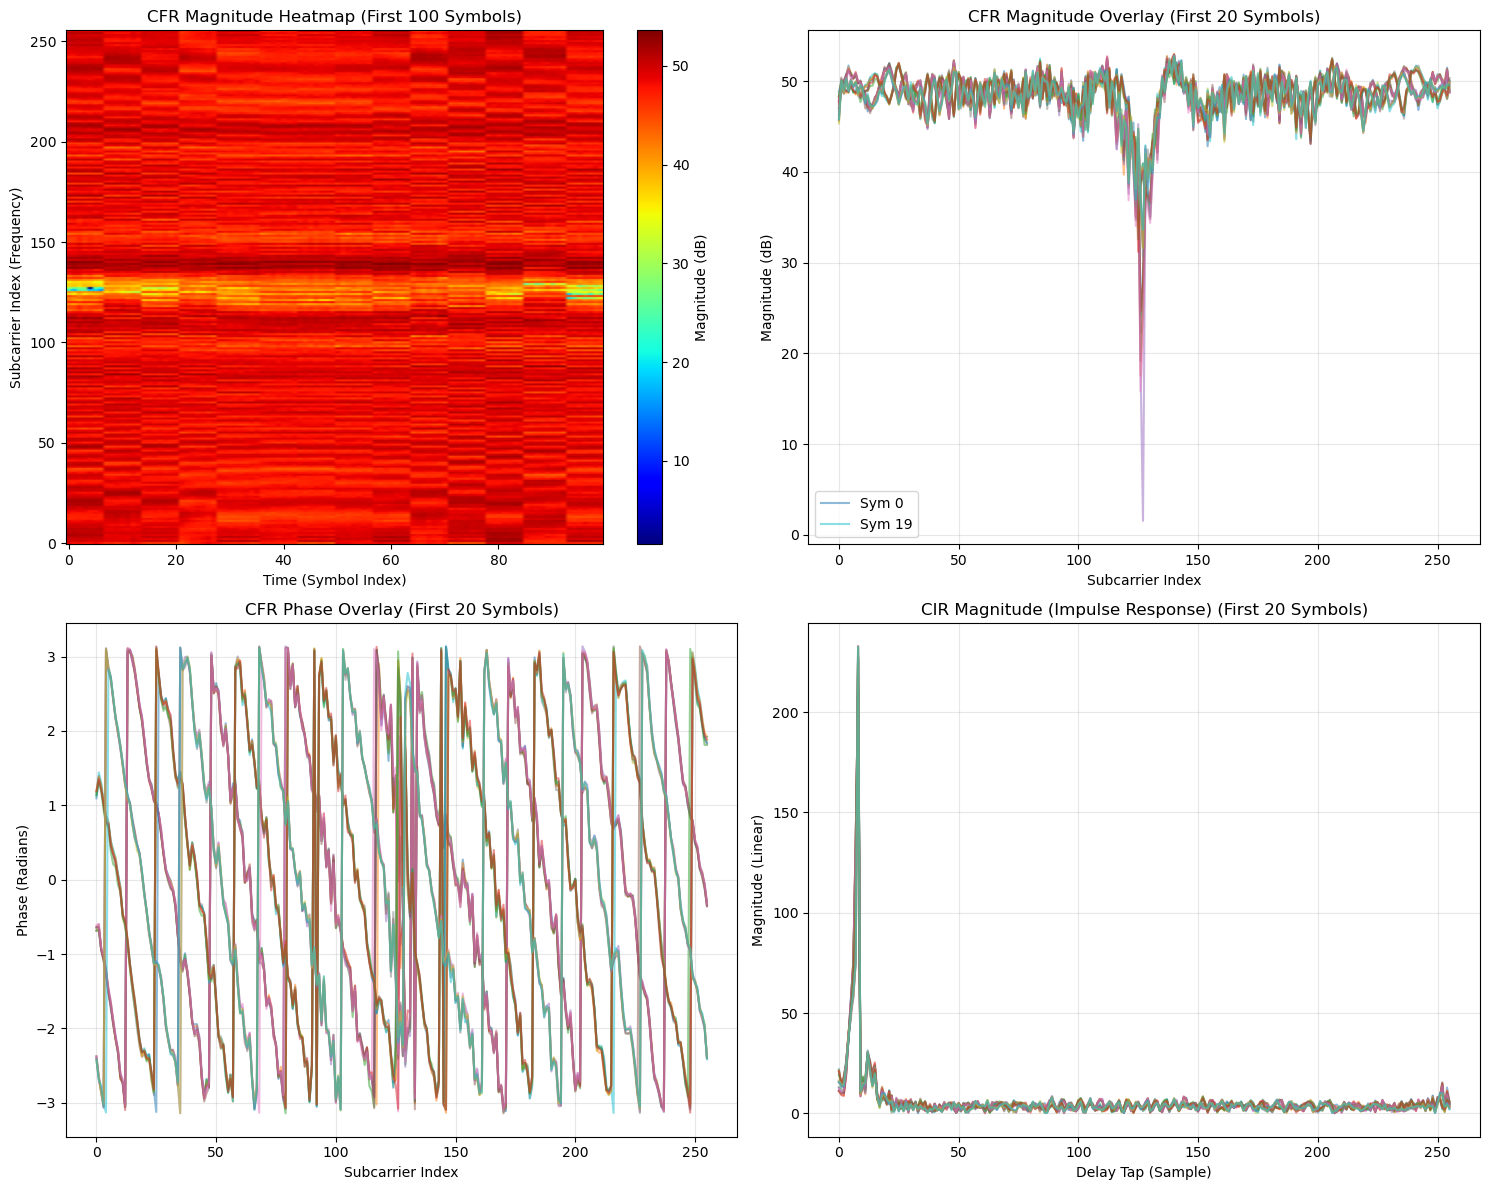

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load Data ---
# Assuming you have the file "channel_frequency_response_sionna.npy"
try:
    cfr_sionna = np.load("channel_frequency_response_sionna.npy")
    print(f"Loaded Shape: {cfr_sionna.shape}")
except FileNotFoundError:
    print("File not found. Using dummy data for demonstration.")
    # Create dummy shape (1, 1, 1, 1, 256, 3587)
    cfr_sionna = np.random.randn(1, 1, 1, 1, 256, 3587) + 1j * np.random.randn(1, 1, 1, 1, 256, 3587)

# --- 2. Preprocessing for Plotting ---
# Squeeze removing dimensions of size 1 -> (Subcarriers, Time)
# resulting shape: (256, 3587)
cfr_2d = np.squeeze(cfr_sionna) 

# If shape is (Time, Subcarriers) instead, transpose it. 
# Based on your previous code, it is (Subcarriers, Time).
if cfr_2d.shape[0] != 256:
    cfr_2d = cfr_2d.T

# Define ranges
num_symbols_heatmap = 100  # "100"
num_symbols_line = 20      # "1 to 20"

# --- 3. Plotting ---
plt.figure(figsize=(15, 12))

# Plot 1: Waterfall/Heatmap of Magnitude (First 100 Symbols)
plt.subplot(2, 2, 1)
# We plot Subcarriers on Y-axis, Time on X-axis
magnitude_db = 20 * np.log10(np.abs(cfr_2d[:, :num_symbols_heatmap]) + 1e-9)
plt.imshow(magnitude_db, aspect='auto', origin='lower', cmap='jet')
plt.colorbar(label='Magnitude (dB)')
plt.title(f"CFR Magnitude Heatmap (First {num_symbols_heatmap} Symbols)")
plt.xlabel("Time (Symbol Index)")
plt.ylabel("Subcarrier Index (Frequency)")

# Plot 2: Superimposed Magnitude (First 20 Symbols)
plt.subplot(2, 2, 2)
for i in range(num_symbols_line):
    plt.plot(magnitude_db[:, i], alpha=0.5, label=f'Sym {i}' if i==0 or i==19 else "")
plt.title(f"CFR Magnitude Overlay (First {num_symbols_line} Symbols)")
plt.xlabel("Subcarrier Index")
plt.ylabel("Magnitude (dB)")
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 3: Phase Evolution (First 20 Symbols)
plt.subplot(2, 2, 3)
for i in range(num_symbols_line):
    plt.plot(np.angle(cfr_2d[:, i]), alpha=0.5)
plt.title(f"CFR Phase Overlay (First {num_symbols_line} Symbols)")
plt.xlabel("Subcarrier Index")
plt.ylabel("Phase (Radians)")
plt.grid(True, alpha=0.3)

# Plot 4: Impulse Response (CIR) - Time Domain (First 20 Symbols)
# IFFT of CFR gives CIR (Multipath Taps)
plt.subplot(2, 2, 4)
cir_2d = np.fft.ifft(cfr_2d, axis=0) # Axis 0 is subcarriers
for i in range(num_symbols_line):
    plt.plot(np.abs(cir_2d[:, i]), alpha=0.5)
plt.title(f"CIR Magnitude (Impulse Response) (First {num_symbols_line} Symbols)")
plt.xlabel("Delay Tap (Sample)")
plt.ylabel("Magnitude (Linear)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()